In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
style.use(style='seaborn-whitegrid')

Loading the data

In [4]:
mnist_data = pd.read_csv(filepath_or_buffer='mnist_train.csv')
display(mnist_data.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l = mnist_data['label']
display(l.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
d = mnist_data.drop(labels='label', axis=1)
display(d.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
display(d.shape)
display(l.shape)

(42000, 784)

(42000,)

In [8]:
def plotter(idx, data, label):
    """
    This functions helps in plotting.
    """
    grid = data.iloc[idx].to_numpy().reshape((28, 28))
    
    plt.figure(figsize=(7, 7))
    plt.title(label=label[idx])
    plt.imshow(grid, cmap='gray')
    plt.show()

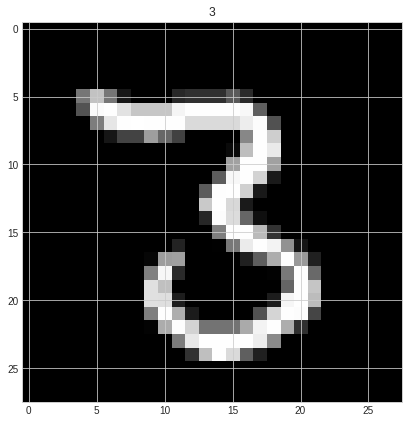

In [9]:
plotter(idx=np.random.randint(low=0, high=42000), data=d, label=l)

Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std_data = StandardScaler().fit_transform(X=d)
display(std_data.shape)

(42000, 784)

Co-Variance Matrix

In [12]:
n = std_data.shape[0]

In [13]:
cov_matrix = (1 / n) * (np.matmul(std_data.T, std_data))
display(cov_matrix)
display(cov_matrix.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(784, 784)

Eigen Values and Eigen Vectors

In [14]:
from scipy.linalg import eigh

In [15]:
e_vals, e_vecs = eigh(a=cov_matrix, subset_by_index=(782, 783))

In [16]:
display(e_vals)
display(e_vecs.shape)

array([29.11077253, 40.69550978])

(784, 2)

In [17]:
e_vector = e_vecs.T

In [18]:
display((e_vector[0] == e_vecs[:, 0]).all())
display((e_vector[1] == e_vecs[:, 1]).all())

True

True

In [19]:
e_vector[[0, 1]] = e_vector[[1, 0]]

In [20]:
display(std_data.shape)
display(e_vector.shape)

(42000, 784)

(2, 784)

In [21]:
new_coord = np.matmul(std_data, e_vector.T)
display(new_coord.shape)

(42000, 2)

In [22]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord)

array([[-5.14047772, -5.2264454 ,  1.        ],
       [19.29233234,  6.03299601,  0.        ],
       [-7.64450341, -1.70581328,  1.        ],
       ...,
       [ 0.49539137,  7.07627667,  7.        ],
       [ 2.30724011, -4.34451279,  6.        ],
       [-4.80767022,  1.55912058,  9.        ]])

In [23]:
pca_df = pd.DataFrame(data=new_coord, columns=('1st_p', '2nd_p', 'label'))
display(pca_df.head())

,1st_p,2nd_p,label
0,-5.140478,-5.226445,1.0
1,19.292332,6.032996,0.0
2,-7.644503,-1.705813,1.0
3,-0.474207,5.836139,4.0
4,26.559574,6.024818,0.0


Visualization

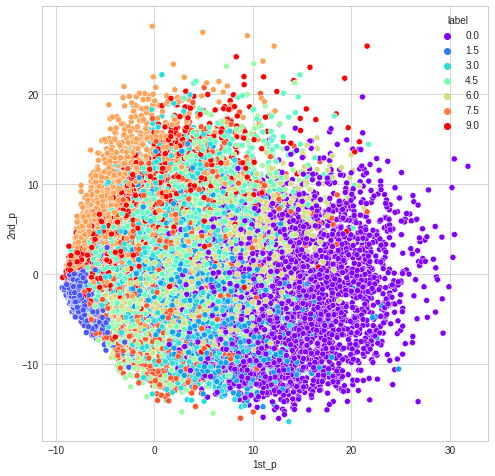

In [24]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=pca_df, x='1st_p', y='2nd_p', hue='label', palette='rainbow')
plt.show()

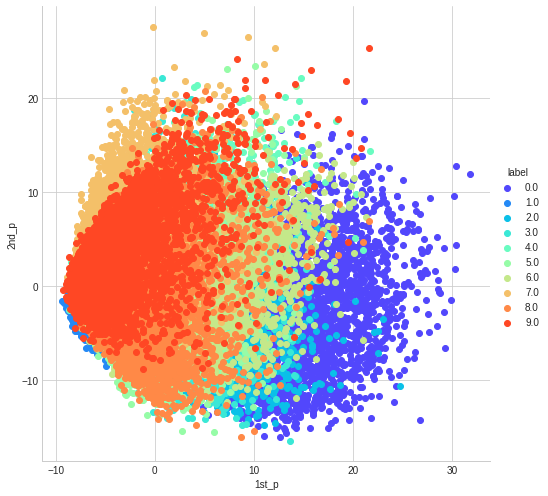

In [25]:
sns.FacetGrid(
    data=pca_df, hue='label', height=7, palette='rainbow').map(plt.scatter, '1st_p', '2nd_p').add_legend()
plt.show()

PCA using Scikit-Learn

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
new_coord = pca.fit_transform(X=std_data)
display(new_coord.shape)

(42000, 2)

In [29]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord)

array([[-5.14050847, -5.22694239,  1.        ],
       [19.29234052,  6.03323469,  0.        ],
       [-7.64447376, -1.70544456,  1.        ],
       ...,
       [ 0.49540389,  7.07643554,  7.        ],
       [ 2.30724616, -4.34439956,  6.        ],
       [-4.80769397,  1.55892847,  9.        ]])

In [30]:
pca_df = pd.DataFrame(data=new_coord, columns=('1st_p', '2nd_p', 'label'))
display(pca_df.head())

,1st_p,2nd_p,label
0,-5.140508,-5.226942,1.0
1,19.292341,6.033235,0.0
2,-7.644474,-1.705445,1.0
3,-0.474199,5.836371,4.0
4,26.559578,6.024835,0.0


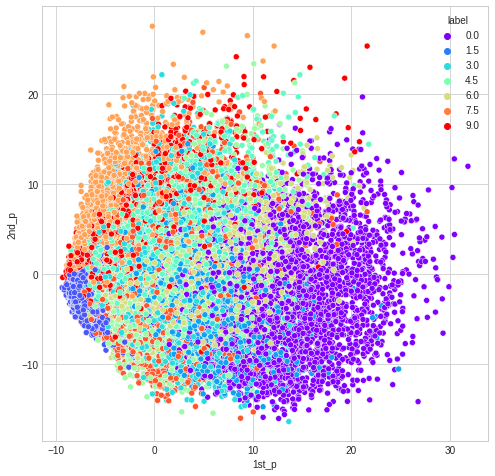

In [31]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=pca_df, x='1st_p', y='2nd_p', hue='label', palette='rainbow')
plt.show()

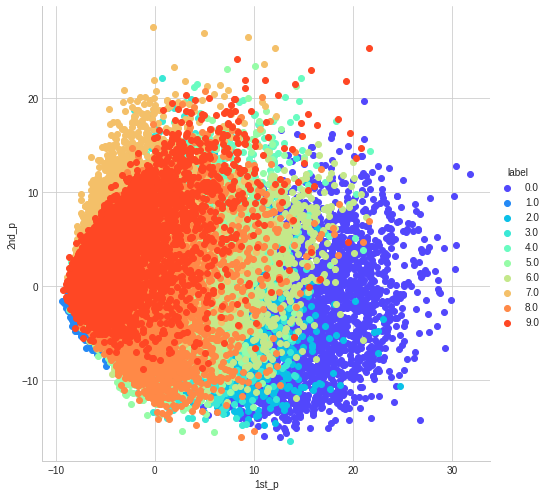

In [32]:
sns.FacetGrid(
    data=pca_df, hue='label', height=7, palette='rainbow').map(plt.scatter, '1st_p', '2nd_p').add_legend()
plt.show()

PCA for Dimensionality Redcution (not for visualization)

In [33]:
pca = PCA(n_components=784)

In [34]:
new_coord = pca.fit_transform(X=std_data)
display(new_coord.shape)

(42000, 784)

In [35]:
percent_var_exp = pca.explained_variance_ratio_
cum_percent_var_exp = np.cumsum(percent_var_exp)

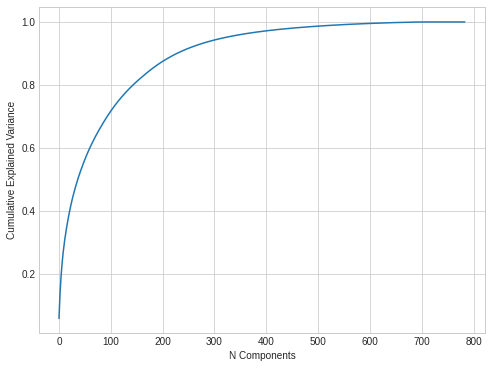

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(cum_percent_var_exp)
plt.xlabel(xlabel='N Components')
plt.ylabel(ylabel='Cumulative Explained Variance')
plt.show()

t-SNE using Scikit-Learn

In [37]:
from sklearn.manifold import TSNE

In [38]:
tSNE = TSNE(n_components=2, random_state=0)

In [39]:
new_coord = tSNE.fit_transform(std_data)
display(new_coord.shape)

(42000, 2)

In [40]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord)

array([[-43.4083252 , -35.14966202,   1.        ],
       [ 25.23840904,  47.77011871,   0.        ],
       [-60.13901138,   0.9344151 ,   1.        ],
       ...,
       [ 51.95186615, -21.11092186,   7.        ],
       [-37.45171738,  49.17252731,   6.        ],
       [ 15.51074409, -42.23746109,   9.        ]])

In [41]:
tsne_df = pd.DataFrame(data=new_coord, columns=('dim1', 'dim2', 'label'))
display(tsne_df.head())

,dim1,dim2,label
0,-43.408325,-35.149662,1.0
1,25.238409,47.770119,0.0
2,-60.139011,0.934415,1.0
3,8.568318,-61.160141,4.0
4,10.867328,57.556770,0.0


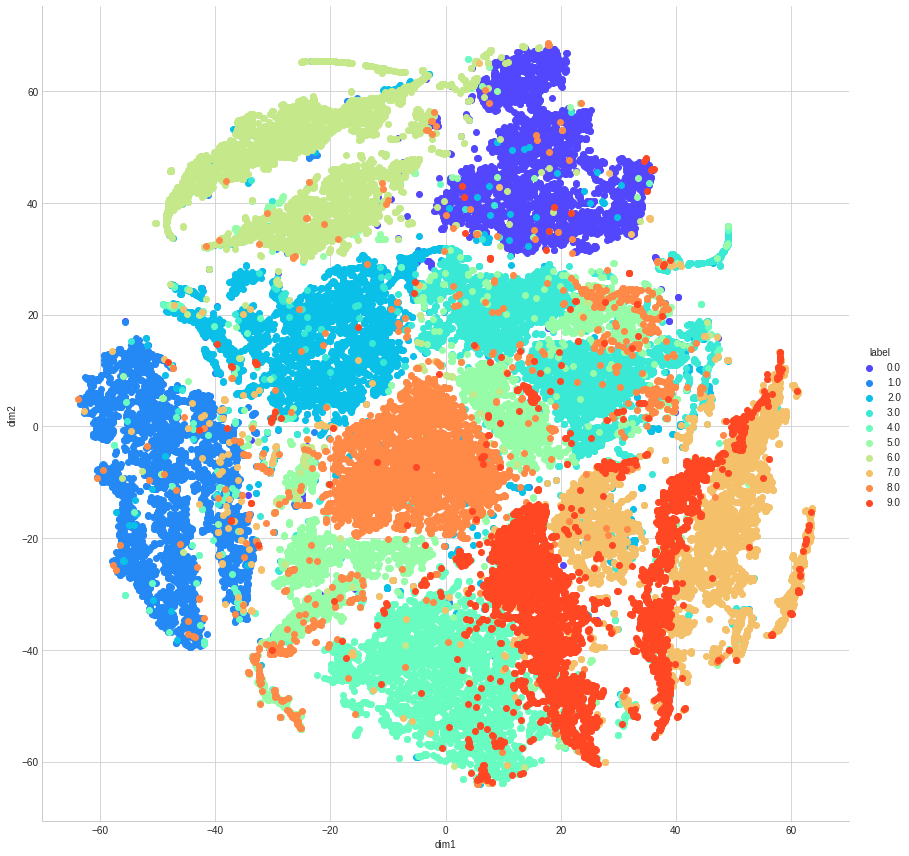

In [43]:
sns.FacetGrid(
    data=tsne_df, hue='label', height=12, palette='rainbow').map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

Perplexity 50

In [44]:
tSNE = TSNE(n_components=2, random_state=0, perplexity=50)

In [45]:
new_coord = tSNE.fit_transform(std_data)
display(new_coord)

array([[-21.958954 ,  -3.4581368],
       [ -5.006719 ,  47.38105  ],
       [-47.3796   , -23.523788 ],
       ...,
       [ 23.63593  , -49.811256 ],
       [-35.352173 ,  44.164013 ],
       [  1.2468572, -39.672195 ]], dtype=float32)

In [46]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord.shape)

(42000, 3)

In [47]:
tsne_df = pd.DataFrame(data=new_coord, columns=('dim1', 'dim2', 'label'))
display(tsne_df.head())

,dim1,dim2,label
0,-21.958954,-3.458137,1.0
1,-5.006719,47.381050,0.0
2,-47.379601,-23.523788,1.0
3,-19.931158,-40.530071,4.0
4,-4.315893,54.720890,0.0


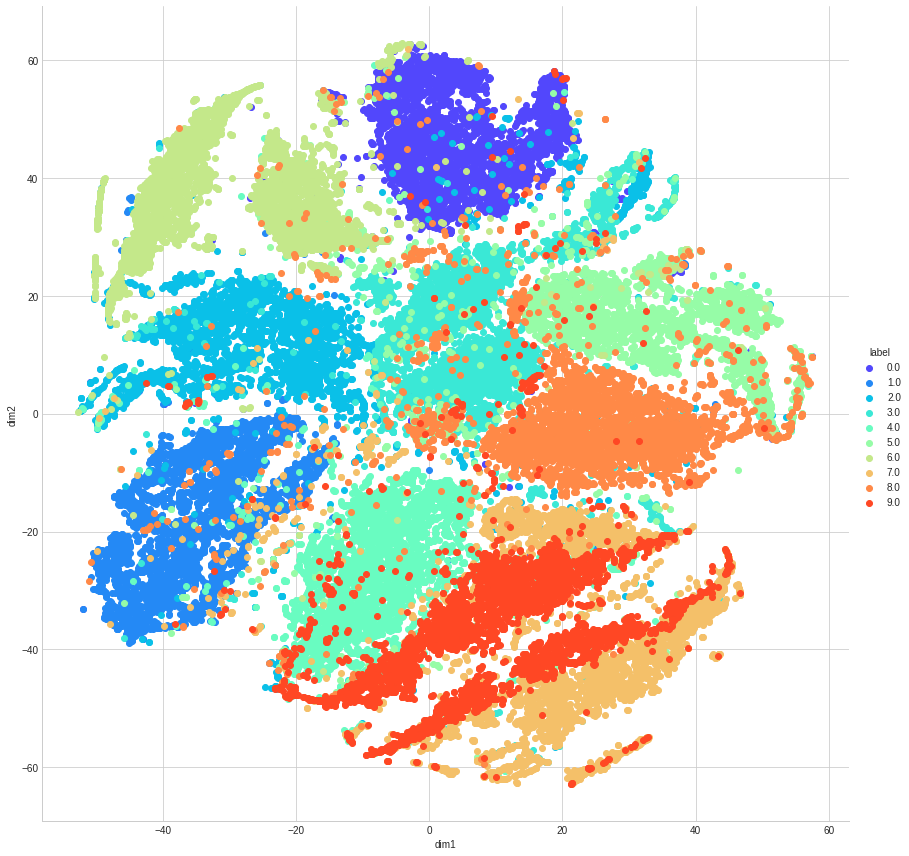

In [48]:
sns.FacetGrid(
    data=tsne_df, hue='label', height=12, palette='rainbow').map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

Perplexity 50, Iterations 5000

In [49]:
tSNE = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)

In [50]:
new_coord = tSNE.fit_transform(std_data)
display(new_coord)

array([[ -49.019196 ,  -14.615038 ],
       [ -15.4772625,  142.6708   ],
       [-119.95837  ,  -44.57812  ],
       ...,
       [  54.86783  , -139.39973  ],
       [ -92.30053  ,  116.08536  ],
       [   1.8338934, -114.75863  ]], dtype=float32)

In [51]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord.shape)

(42000, 3)

In [52]:
tsne_df = pd.DataFrame(data=new_coord, columns=('dim1', 'dim2', 'label'))
display(tsne_df.head())

,dim1,dim2,label
0,-49.019196,-14.615038,1.0
1,-15.477262,142.670807,0.0
2,-119.958366,-44.578121,1.0
3,-46.750877,-120.279060,4.0
4,-13.177286,159.309631,0.0


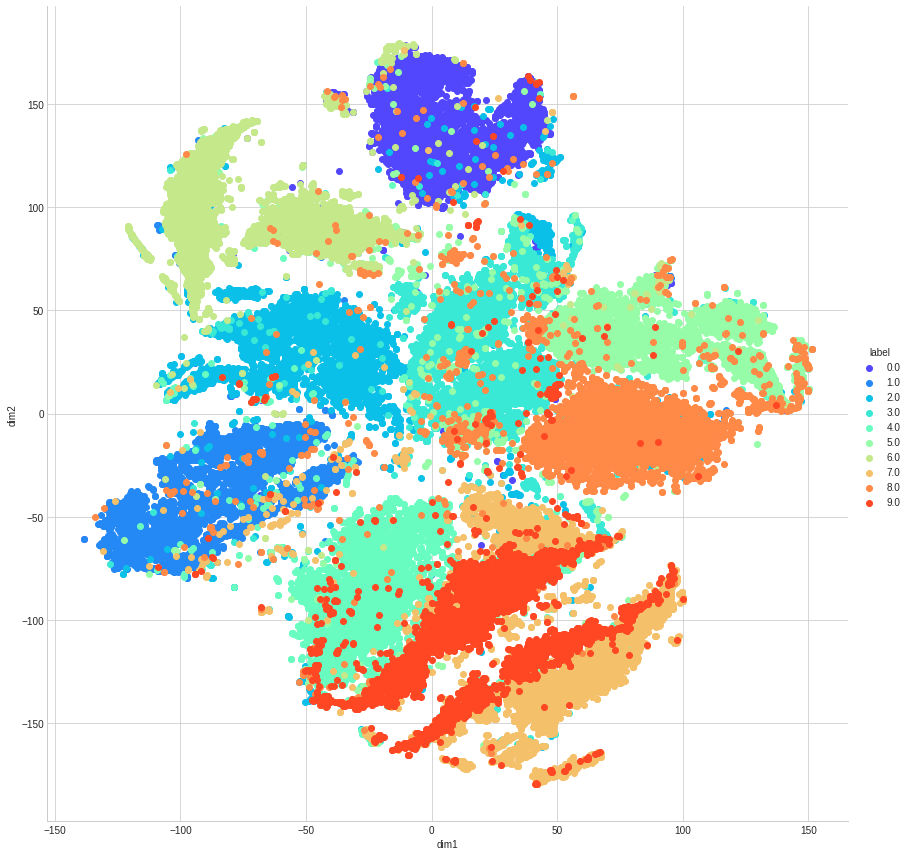

In [53]:
sns.FacetGrid(
    data=tsne_df, hue='label', height=12, palette='rainbow').map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

Perplexity 100, Iterations 10000

In [54]:
tSNE = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=10000)

In [55]:
new_coord = tSNE.fit_transform(std_data)
display(new_coord)

array([[ 105.46727 ,  -38.639267],
       [ -34.57456 ,  139.38693 ],
       [ -83.31658 ,  -23.930809],
       ...,
       [  25.162598, -147.8795  ],
       [-101.488235,  106.23007 ],
       [ -12.138205, -105.87134 ]], dtype=float32)

In [56]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord.shape)

(42000, 3)

In [57]:
tsne_df = pd.DataFrame(data=new_coord, columns=('dim1', 'dim2', 'label'))
display(tsne_df.head())

,dim1,dim2,label
0,105.467270,-38.639267,1.0
1,-34.574558,139.386932,0.0
2,-83.316582,-23.930809,1.0
3,-48.024094,-93.829430,4.0
4,-28.188765,153.735931,0.0


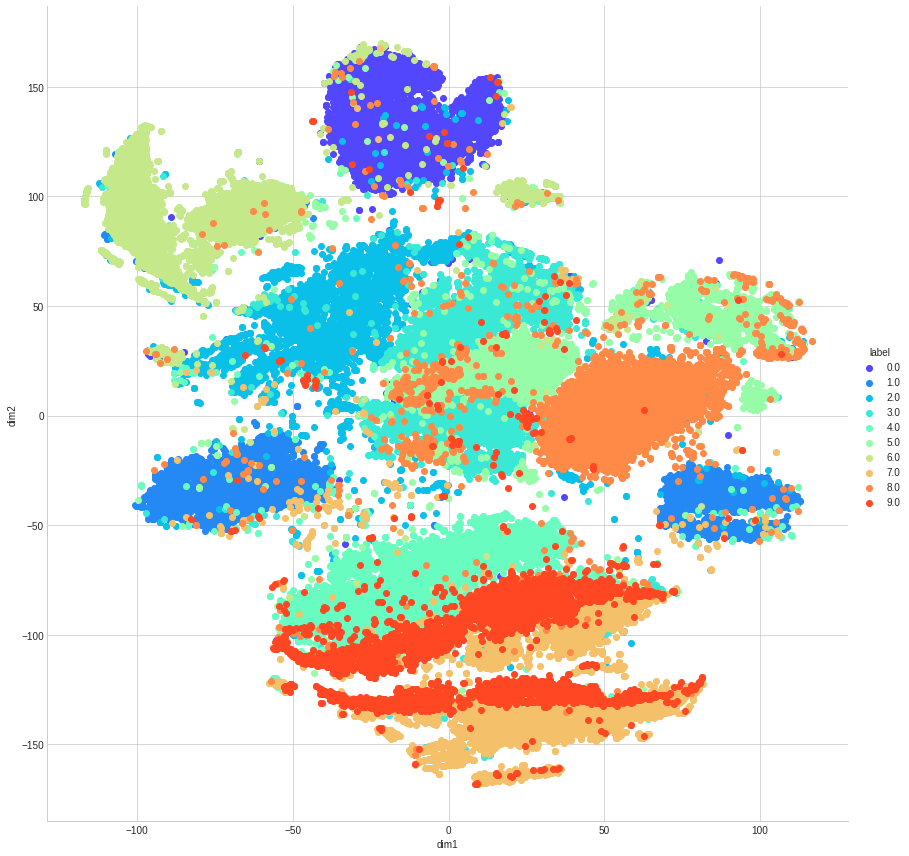

In [58]:
sns.FacetGrid(
    data=tsne_df, hue='label', height=12, palette='rainbow').map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

Perplexity 500, Iterations 10000

In [59]:
tSNE = TSNE(n_components=2, random_state=0, perplexity=500, n_iter=10000)

In [60]:
new_coord = tSNE.fit_transform(std_data)
display(new_coord)

array([[ 21.566607 ,  21.94763  ],
       [  1.5035938,  59.310467 ],
       [-27.569147 , -24.473207 ],
       ...,
       [ 35.1202   , -54.941265 ],
       [-34.137726 ,  61.411575 ],
       [  9.563843 , -49.788204 ]], dtype=float32)

In [61]:
new_coord = np.hstack(tup=(new_coord, l.to_numpy().reshape((42000, 1))))
display(new_coord.shape)

(42000, 3)

In [62]:
tsne_df = pd.DataFrame(data=new_coord, columns=('dim1', 'dim2', 'label'))
display(tsne_df.head())

,dim1,dim2,label
0,21.566607,21.947630,1.0
1,1.503594,59.310467,0.0
2,-27.569147,-24.473207,1.0
3,-8.449393,-47.954205,4.0
4,6.436391,61.976280,0.0


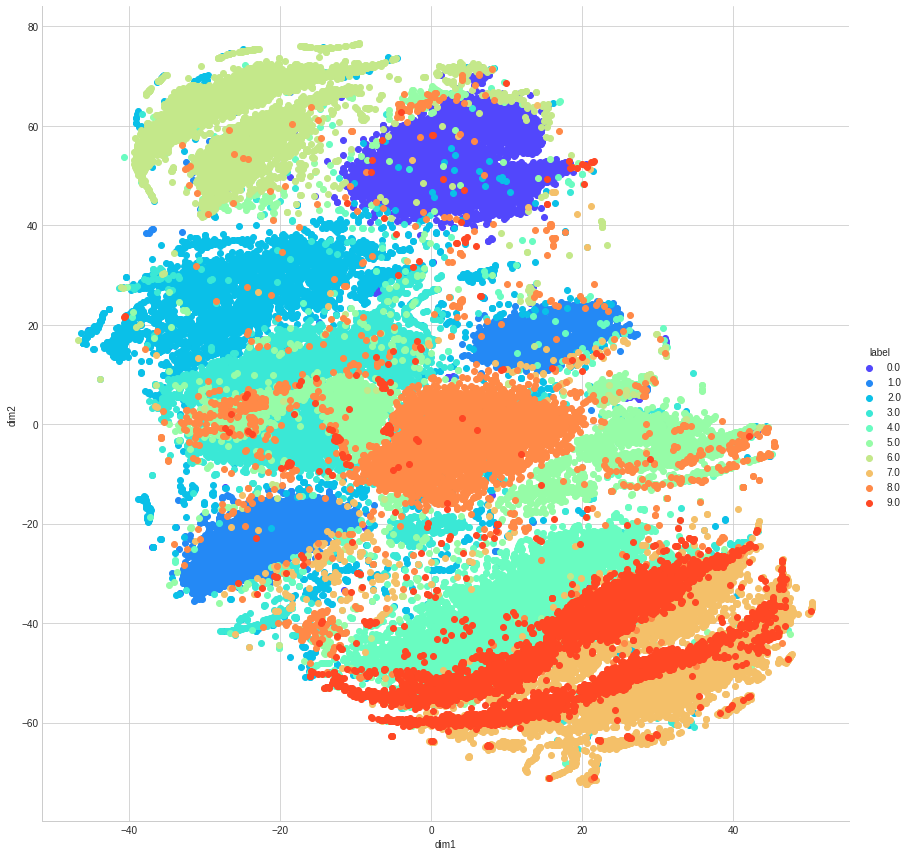

In [63]:
sns.FacetGrid(
    data=tsne_df, hue='label', height=12, palette='rainbow').map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()